### The goal is to get a dataframe of the measured position 

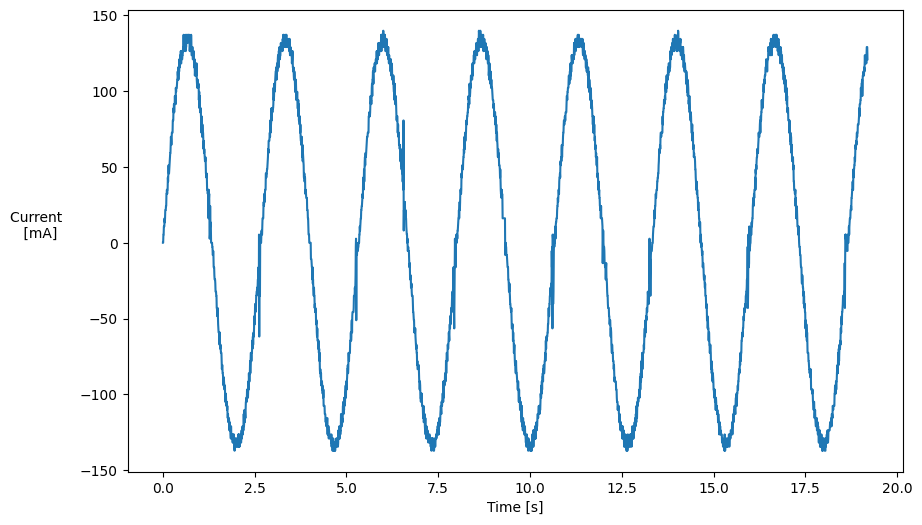

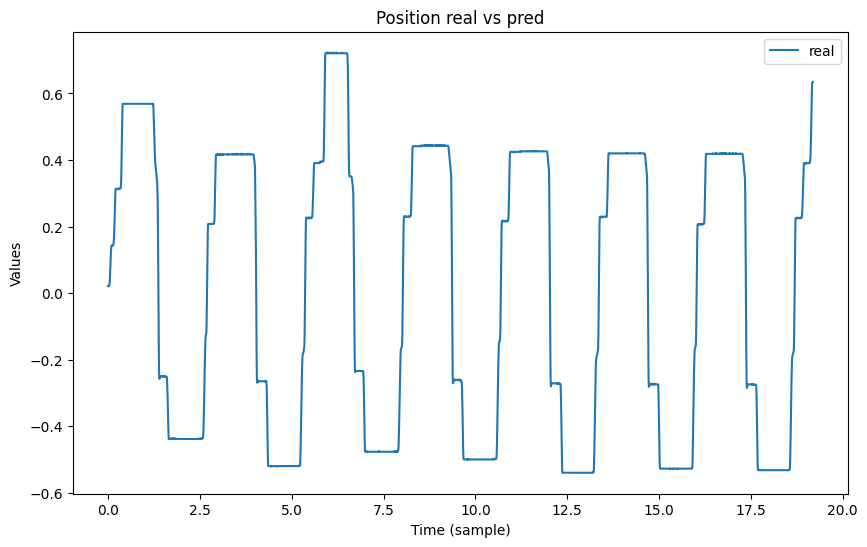

In [4]:
from src.data_processing import process_file
from src.plotting import (
    plot_measured_I, 
    plot_measured_q, 
    plot_measured_q_dot,
    plot_measured_U
)
import numpy as np
import matplotlib.pyplot as plt

# Select the measurements
# file_path = "data/exp12_01/exp12_01_M1_sinus_short_20ms.txt"
# file_path = "data/exp05_02/exp05_02_M1_T_ctrl_5.txt"
file_path = "data/exp05_02/exp05_02_M1_T_ctrl_sinus_1.txt"
df = process_file(file_path)

# Adapt the time
df['t'] = df['t'] * 80e-3 # in s
df.DXL_Position = df.DXL_Position + (3 * np.pi/180)

# The position should be at 0 when the leg is straight, and in rad
df['DXL_Position'] = df['DXL_Position'] - np.pi/2

# Compute the original reference trajectory used for the real experiment
time_step = 0.02  # Time step in seconds
period = 5        # Period of the sinus wave in seconds
total_time = 20   # Total time for the simulation in seconds

# Time array from 0 to total_time with a step of time_step
time = np.arange(0, total_time, time_step)

# Sinus trajectory
# The sinus function in numpy takes angle in radians, so we need to convert degrees to radians.
# We want the sinus wave to complete one full cycle (0 to 180 degrees) in 5 seconds.
# Thus, the angular frequency (omega) is 2 * np.pi / period.
omega = 2 * np.pi / period
df['position_reference'] = 2/3  * np.sin(omega * df['t'])

plot_measured_I(df)

plt.figure(figsize=(10, 6))
plt.plot(df['t'], df['DXL_Position'].shift(-1), label='real')
# plt.plot(df['position_reference'], label='pred')
plt.xlabel('Time (sample)')
plt.ylabel('Values')
plt.title(f'Position real vs pred')
plt.legend()
plt.show()


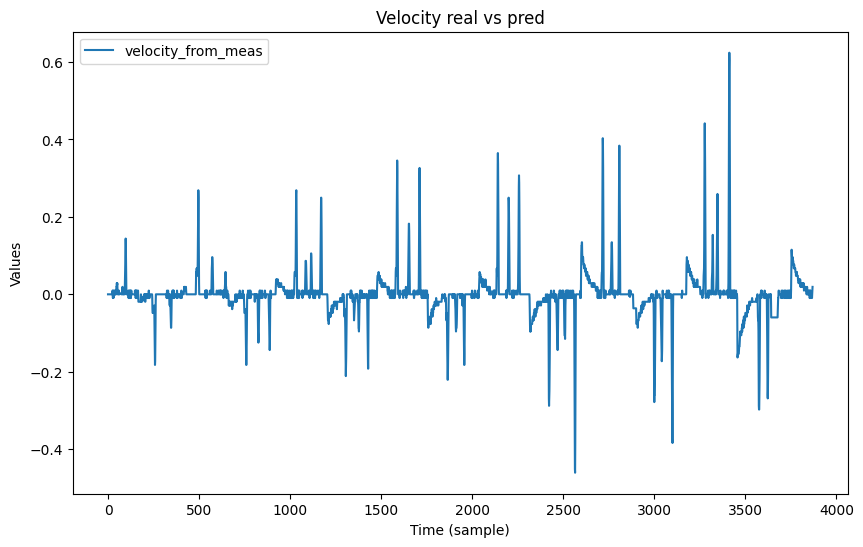

In [146]:
import numpy as np

# Compute the velocity and acceleration

# Calculate velocity (first derivative of position)
df['velocity_from_meas'] = np.gradient(df['DXL_Position'], df['t'])
df['velocity_from_ref'] = np.gradient(df['position_reference'], df['t'])

# Calculate acceleration (second derivative of position)
df['acc_from_velocity_from_meas'] = np.gradient(df['velocity_from_meas'], df['t'])
df['acc_from_meas'] = np.gradient(df['DXL_Velocity'], df['t'])
df['acc_from_ref'] = np.gradient(df['velocity_from_ref'], df['t'])

plt.figure(figsize=(10, 6))
plt.plot(df['velocity_from_meas'], label='velocity_from_meas')
# plt.plot(df['velocity_from_ref'], label='velocity_from_ref')
# plt.plot(df['DXL_Velocity'], label='DXL_Velocity')

# plt.plot(df['acc_from_velocity_from_meas'], label='acc_from_velocity_from_meas')
# plt.plot(df['acc_from_meas'], label='acc_from_meas')
# plt.plot(df['acc_from_ref'], label='acc_from_ref')
plt.xlabel('Time (sample)')
plt.ylabel('Values')
plt.title(f'Velocity real vs pred')
plt.legend()
plt.show()

In [147]:
# Export the data for further analysis in Julia

df.to_csv('data/Julia_analysis/chute_libre.csv', index=False)

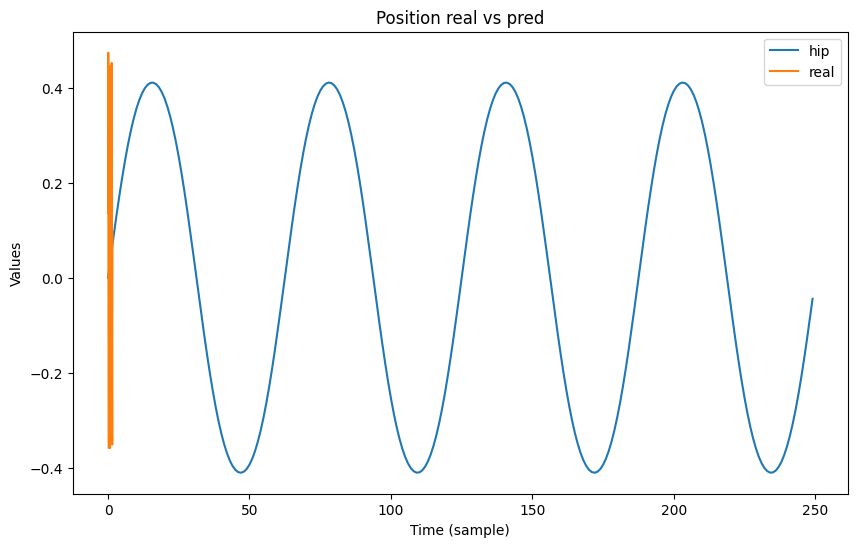

In [131]:
# Plot torque from Julia
import pandas as pd
df = pd.read_csv("data/Julia_analysis/updated_file.csv")
kt = 2.6657
ke = 3.8197

plt.figure(figsize=(10, 6))
plt.plot(df['torque_hip_from_ref'], label='hip')
# plt.plot(df['torque_knee_from_ref'], label='knee')

# plt.plot(df['torque_hip_from_meas'], label='hip1')
# plt.plot(df['torque_knee_from_meas'], label='knee1')

# plt.plot(df['torque_hip_meas'], label='hip2')
# plt.plot(df['torque_knee_meas'], label='knee2')

# plt.plot(df['t']*80e-3, df['DXL_Current'].shift(-1) * kt, label='real')
# plt.plot((df['U'] - ke * df['DXL_Velocity'])/5, label='comp')
# plt.plot((df['DXL_Velocity']), label='comp')
plt.xlabel('Time (sample)')
plt.ylabel('Values')
plt.title(f'Position real vs pred')
plt.legend()
plt.show()

# Continuer, et sûrement devoir calculer le couple à partir d'une autre mesure, comme la tension par ex...

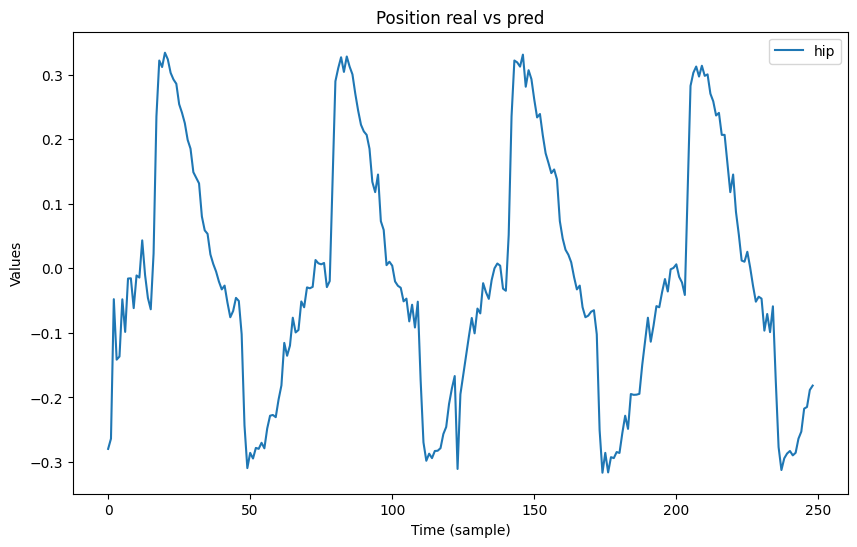

In [106]:
kt = 2.6657
friction_torque = df['torque_hip_from_ref'] - df['DXL_Current'].shift(-1) * kt

plt.figure(figsize=(10, 6))
plt.plot(friction_torque, label='hip')

plt.xlabel('Time (sample)')
plt.ylabel('Values')
plt.title(f'Position real vs pred')
plt.legend()
plt.show()

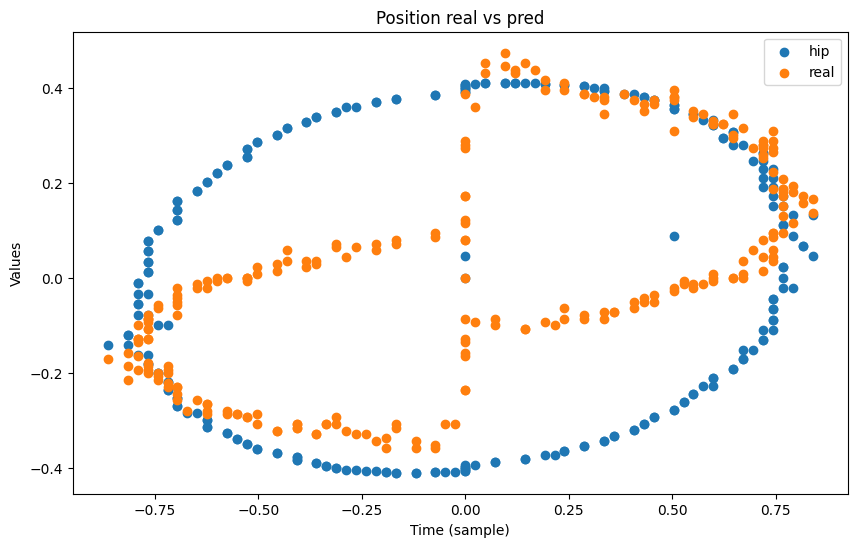

In [108]:
# Plot in function of the velocity

plt.figure(figsize=(10, 6))
# plt.scatter(df['DXL_Velocity'], df['torque_hip_from_ref'], label='hip')
plt.scatter(df['DXL_Velocity'], df['torque_hip_from_ref'], label='hip')
plt.scatter(df['DXL_Velocity'], df['DXL_Current'] * kt, label='real')

plt.xlabel('Time (sample)')
plt.ylabel('Values')
plt.title(f'Position real vs pred')
plt.legend()
plt.show()

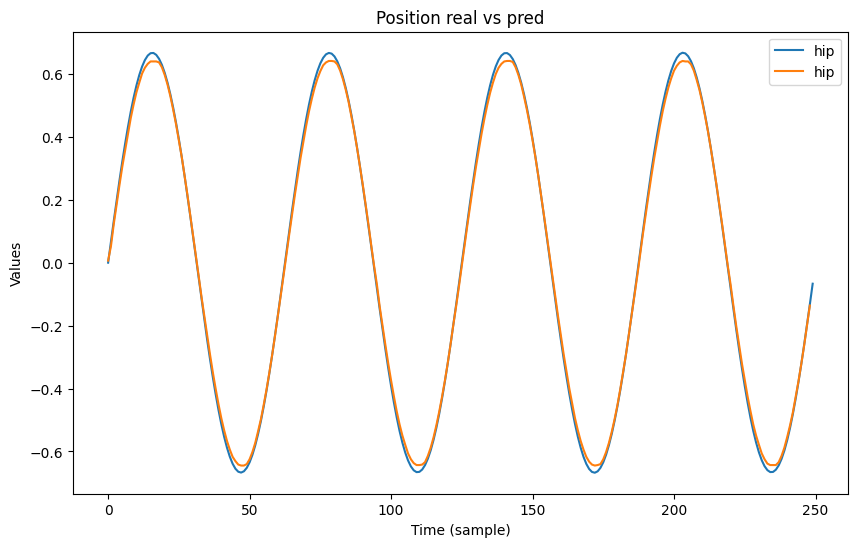

In [105]:
# Plot position evolution

plt.figure(figsize=(10, 6))
plt.plot(df['position_from_julia_hip'], label='hip')
plt.plot(df['DXL_Position'].shift(-1), label='hip')
# plt.plot(df['position_from_julia_knee'], label='knee')
plt.xlabel('Time (sample)')
plt.ylabel('Values')
plt.title(f'Position real vs pred')
plt.legend()
plt.show()